In [97]:
# steps in Data Preprocessing :
# 1: Import all respective libraries
# 2: Upload the dataset
# 3: Cleaning the data
# 4: Understanding the data
# 5: Missing value handling

In [100]:
# Step 1: Import all respective libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.feature_selection import SelectKBest,chi2,f_classif
from sklearn.metrics import mean_squared_error, r2_score

In [101]:
# Step 2: Upload the dataset
# Load the dataset into a DataFrame
df = pd.read_csv(r"C:\Users\meris\Downloads\expanded_nutrition_dataset_1698_rows.csv")

In [102]:
df.head()

,Age,Gender,Height,Weight,Activity Level,Fitness Goal,Dietary Preference,Daily Calorie Target,Protein,Carbohydrates,Fat,Breakfast Suggestion,Lunch Suggestion,Dinner Suggestion,Snack Suggestion
0,25,Male,180,80,Moderately Active,Weight Loss,Omnivore,2000,120,250,60,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Salmon with roasted vegetables,Greek yogurt with fruit
1,32,Female,165,65,Lightly Active,Weight Loss,Vegetarian,1600,80,200,40,Tofu scramble with veggies,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Apple with almond butter
2,48,Male,175,95,Sedentary,Maintenance,Vegan,2200,100,300,65,Tofu and veggie breakfast burrito,Black bean burger on a whole wheat bun,Lentil and vegetable curry,Trail mix
3,55,Female,160,70,Very Active,Weight Loss,Omnivore,2500,140,350,80,Greek yogurt with granola and fruit,Chicken and vegetable stir-fry,Turkey chili with brown rice,Banana with peanut butter
4,62,Male,170,85,Sedentary,Maintenance,Vegetarian,2000,80,250,55,Scrambled eggs with whole wheat toast and avocado,Quinoa salad with chickpeas and vegetables,Vegetarian chili with cornbread,Fruit and nut mix


In [103]:
print(df.columns)

Index(['Age', 'Gender', 'Height', 'Weight', 'Activity Level', 'Fitness Goal',
       'Dietary Preference', 'Daily Calorie Target', 'Protein',
       'Carbohydrates', 'Fat', 'Breakfast Suggestion', 'Lunch Suggestion',
       'Dinner Suggestion', 'Snack Suggestion'],
      dtype='object')


In [104]:
df.columns = df.columns.str.strip()  # removes any leading/trailing spaces

In [105]:
# Step 3: Cleaning the data
# Checking for duplicate rows and dropping if any
df.drop_duplicates(inplace=True)
print(f"Data shape after removing duplicates: {df.shape}")

Data shape after removing duplicates: (1698, 15)


In [106]:
df.nunique()

Age                      62
Gender                    2
Height                   51
Weight                   71
Activity Level            5
Fitness Goal              4
Dietary Preference        4
Daily Calorie Target    895
Protein                 231
Carbohydrates           276
Fat                     103
Breakfast Suggestion    121
Lunch Suggestion        190
Dinner Suggestion       177
Snack Suggestion        112
dtype: int64

In [107]:
df['Breakfast Suggestion'].unique()

array(['Oatmeal with berries and nuts', 'Tofu scramble with veggies',
       'Tofu and veggie breakfast burrito',
       'Greek yogurt with granola and fruit',
       'Scrambled eggs with whole wheat toast and avocado',
       'Protein pancakes with fruit and nuts',
       'Tofu and chickpea scramble',
       'Overnight oats with fruit and chia seeds',
       'Tofu scramble with vegetables', 'Wholegrain toast with avocado',
       'Greek yogurt with granola', 'Tofu and vegetable stir-fry',
       'Oatmeal with protein powder and fruit',
       'Eggs with wholegrain toast',
       'Greek yogurt with berries and granola',
       'Eggs with whole wheat toast and avocado',
       'Tofu scramble with vegetables and avocado',
       'Greek yogurt with fruit and granola',
       'Tofu scramble with spinach and avocado',
       'Scrambled eggs with whole wheat toast and fruit',
       'Oatmeal with berries and plant-based milk',
       'Oatmeal with fruit and nuts',
       'Tofu scramble with 

In [108]:
df['Lunch Suggestion'].unique()

array(['Grilled chicken salad with mixed greens',
       'Lentil soup with whole wheat bread',
       'Black bean burger on a whole wheat bun',
       'Chicken and vegetable stir-fry',
       'Quinoa salad with chickpeas and vegetables',
       'Lentil pasta with vegetables',
       'Chicken breast with brown rice and vegetables',
       'Lentil burger with sweet potato fries',
       'Lentil soup with wholegrain bread', 'Black bean salad',
       'Tuna salad sandwich on wholegrain bread',
       'Lentil and vegetable stew',
       'Black bean burger on a wholegrain bun',
       'Grilled chicken breast with brown rice',
       'Chicken breast with brown rice',
       'Salmon salad with mixed greens and avocado',
       'Chicken breast with sweet potato and broccoli',
       'Turkey sandwich on whole wheat bread with vegetables',
       'Vegan lentil stew with whole wheat bread',
       'Tuna salad with whole wheat bread',
       'Lentil and vegetable curry with brown rice',
       'Tun

In [109]:
df['Dinner Suggestion'].unique()

array(['Salmon with roasted vegetables',
       'Vegetable stir-fry with brown rice', 'Lentil and vegetable curry',
       'Turkey chili with brown rice', 'Vegetarian chili with cornbread',
       'Vegan stir-fry with brown rice',
       'Steak with sweet potato and broccoli',
       'Quinoa and vegetable bowl', 'Vegan chili with cornbread',
       'Vegan pasta with vegetables and sauce',
       'Chickpea and vegetable curry', 'Vegetable stir-fry with tofu',
       'Chicken breast with steamed vegetables', 'Vegan chili',
       'Lentil pasta with vegetables', 'Steak with roasted vegetables',
       'Chicken stir-fry with brown rice',
       'Vegetarian chili with brown rice',
       'Chicken and vegetable stir-fry with brown rice',
       'Tofu stir-fry with brown rice and vegetables',
       'Chicken breast with sweet potato and green beans',
       'Vegan pasta with vegetables and tomato sauce',
       'Black bean burgers with sweet potato fries',
       'Tofu stir-fry with brown ric

In [110]:
df['Snack Suggestion'].unique()

array(['Greek yogurt with fruit', 'Apple with almond butter', 'Trail mix',
       'Banana with peanut butter', 'Fruit and nut mix',
       'Hummus and veggie wrap', 'Protein shake',
       'Cottage cheese with fruit', 'Energy bar',
       'Fruit and veggie sticks', 'Trail mix with nuts and seeds',
       'Fruit salad with yogurt', 'Popcorn',
       'Smoothie with protein powder', 'Fruit and nuts', 'Protein bar',
       'Apple with peanut butter', 'Trail mix with nuts and dried fruit',
       'Greek yogurt with fruit and granola', 'Banana with almond butter',
       'Mixed nuts and seeds', 'Apple slices with peanut butter',
       'Fruit smoothie', 'Apple slices with almond butter',
       'Fruit and cheese', 'Fruit and yogurt', 'Fruit salad with nuts',
       'Protein shake with banana', 'Energy bar with nuts and seeds',
       'Smoothie with protein powder and fruit', 'Mixed nuts',
       'Greek yogurt with nuts and seeds',
       'Trail mix with almonds and dried fruit',
       'Frui

In [111]:
# Step 4: Understanding the data
# Check the shape, data types, and summary statistics
print("\nData Info:\n")
df.info()


Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   1698 non-null   int64 
 1   Gender                1698 non-null   object
 2   Height                1698 non-null   int64 
 3   Weight                1698 non-null   int64 
 4   Activity Level        1698 non-null   object
 5   Fitness Goal          1698 non-null   object
 6   Dietary Preference    1698 non-null   object
 7   Daily Calorie Target  1698 non-null   int64 
 8   Protein               1698 non-null   int64 
 9   Carbohydrates         1698 non-null   int64 
 10  Fat                   1698 non-null   int64 
 11  Breakfast Suggestion  1698 non-null   object
 12  Lunch Suggestion      1698 non-null   object
 13  Dinner Suggestion     1698 non-null   object
 14  Snack Suggestion      1698 non-null   object
dtypes: int64(7), object(8)
me

In [112]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
                Age       Height       Weight  Daily Calorie Target  \
count  1698.000000  1698.000000  1698.000000           1698.000000   
mean     43.961720   174.130153    78.064193           2275.171967   
std      15.915002    13.420936    16.949264            558.812405   
min      18.000000   150.000000    48.000000           1200.000000   
25%      30.000000   163.250000    64.000000           1800.000000   
50%      42.000000   174.000000    78.000000           2200.000000   
75%      57.000000   185.000000    91.000000           2689.000000   
max      79.000000   200.000000   119.000000           4364.000000   

           Protein  Carbohydrates          Fat  
count  1698.000000    1698.000000  1698.000000  
mean    139.898115     252.385159    69.700824  
std      53.326588      69.877804    21.430707  
min      50.000000     120.000000    30.000000  
25%     100.000000     200.000000    52.000000  
50%     136.000000     248.000000    69.000000  
75% 

In [113]:
# Step 5: Missing value handling
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Age                     0
Gender                  0
Height                  0
Weight                  0
Activity Level          0
Fitness Goal            0
Dietary Preference      0
Daily Calorie Target    0
Protein                 0
Carbohydrates           0
Fat                     0
Breakfast Suggestion    0
Lunch Suggestion        0
Dinner Suggestion       0
Snack Suggestion        0
dtype: int64


In [114]:
#Step 6: Data Vizualization
sns.set()

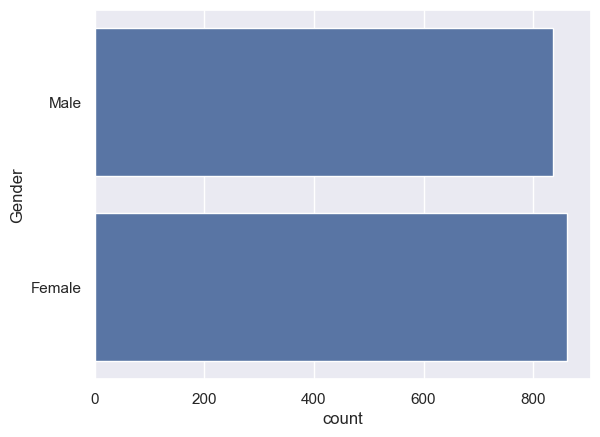

In [115]:
#plotting the gender column in count plot
sns.countplot(df['Gender'])
plt.show()

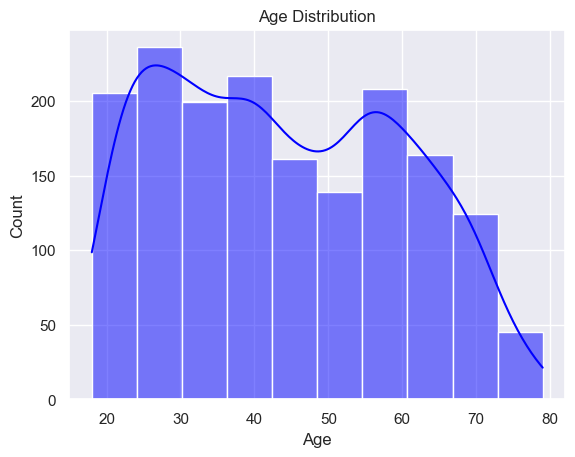

In [123]:
#finding the distribution of age column
sns.histplot(df['Age'], kde=True, bins=10, color='blue')
# Add titles and labels
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

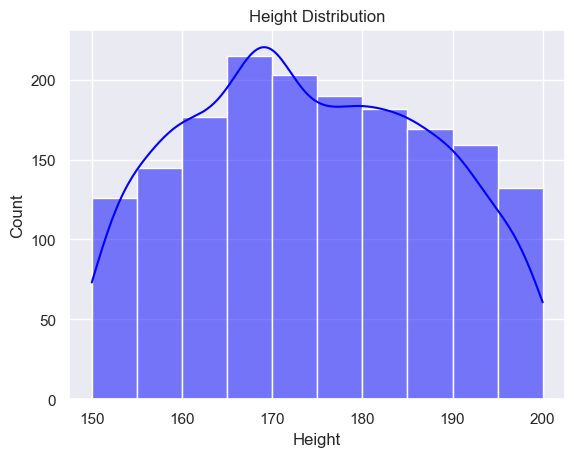

In [134]:
#finding the distribution of Height column
sns.histplot(df['Height'], kde=True, bins=10, color='blue')
# Add titles and labels
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()

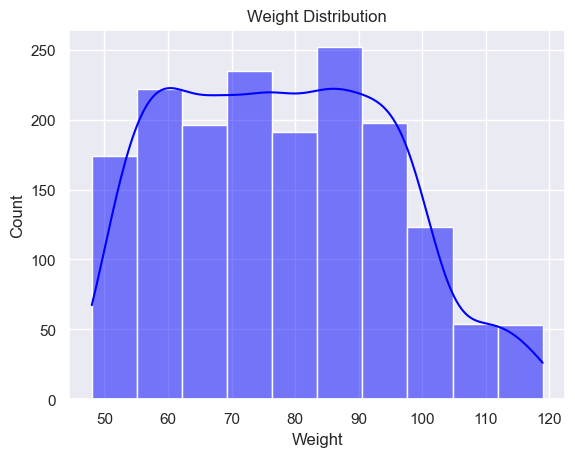

In [135]:
#finding the distribution of Weight column
sns.histplot(df['Weight'], kde=True, bins=10, color='blue')
# Add titles and labels
plt.title('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

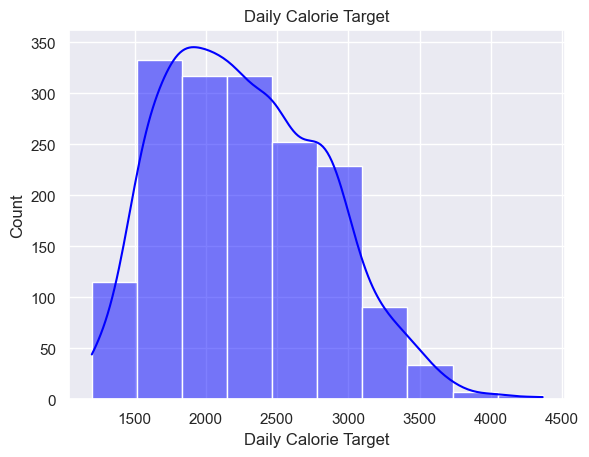

In [137]:
#finding the distribution of Daily Calorie Target column
sns.histplot(df['Daily Calorie Target'], kde=True, bins=10, color='blue')
# Add titles and labels
plt.title('Daily Calorie Target')
plt.xlabel('Daily Calorie Target')
plt.ylabel('Count')
plt.show()

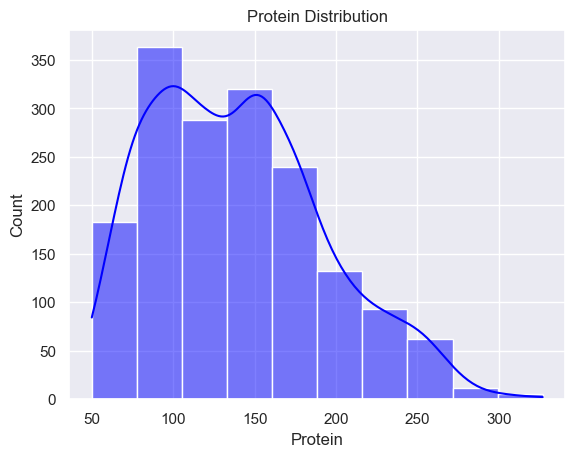

In [138]:
#finding the distribution of Protein column
sns.histplot(df['Protein'], kde=True, bins=10, color='blue')
# Add titles and labels
plt.title('Protein Distribution')
plt.xlabel('Protein')
plt.ylabel('Count')
plt.show()

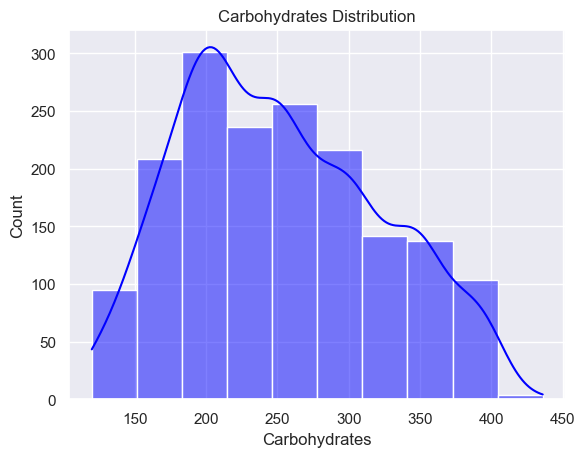

In [140]:
#finding the distribution of Carbohydrates column
sns.histplot(df['Carbohydrates'], kde=True, bins=10, color='blue')
# Add titles and labels
plt.title('Carbohydrates Distribution')
plt.xlabel('Carbohydrates')
plt.ylabel('Count')
plt.show()

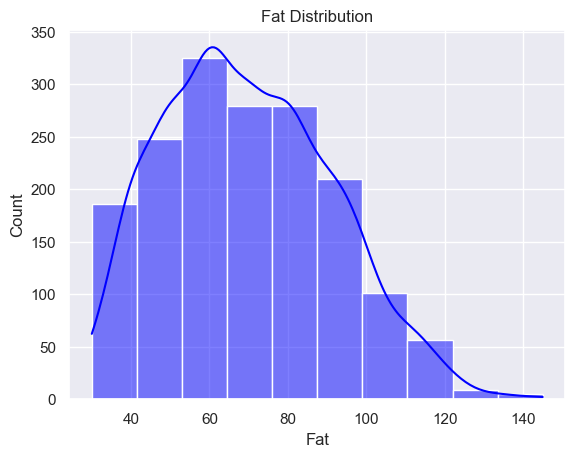

In [142]:
#finding the distribution of Fat column
sns.histplot(df['Fat'], kde=True, bins=10, color='blue')
# Add titles and labels
plt.title('Fat Distribution')
plt.xlabel('Fat')
plt.ylabel('Count')
plt.show()

In [144]:
#finding correlation of dataset
#1. Positive correlation
#2. Negative correlation

In [147]:
#correlation with heatmap to interpret the relation and multicolliniarity
s=df.select_dtypes(include='number').corr()

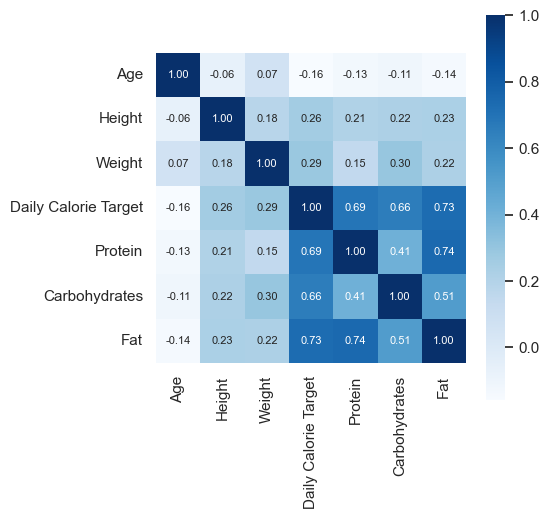

In [151]:
plt.figure(figsize=[5, 5])
sns.heatmap(s, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size': 8}, cmap='Blues')
plt.show()

In [153]:
from sklearn.preprocessing import LabelEncoder

# Columns for label encoding
label_cols = ['Gender', 'Activity Level', 'Fitness Goal', 'Dietary Preference']
label_encoders = {}

# Apply Label Encoding to these columns
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save the encoder for reference

# Apply One-Hot Encoding to "Suggestion" columns
suggestion_cols = ['Breakfast Suggestion', 'Lunch Suggestion', 'Dinner Suggestion', 'Snack Suggestion']
df = pd.get_dummies(df, columns=suggestion_cols, drop_first=True)

# Display the first few rows of the transformed data
df.head()


,Age,Gender,Height,Weight,Activity Level,Fitness Goal,Dietary Preference,Daily Calorie Target,Protein,Carbohydrates,...,Snack Suggestion_Trail mix with nuts and dried fruit,Snack Suggestion_Trail mix with nuts and dried fruits,Snack Suggestion_Trail mix with nuts and seeds,Snack Suggestion_Vegetable sticks with hummus,Snack Suggestion_Whole-grain crackers with hummus,Snack Suggestion_Yogurt Parfait with Granola,Snack Suggestion_Yogurt parfait with granola,Snack Suggestion_Yogurt with fruit,Snack Suggestion_Yogurt with fruit and granola,Snack Suggestion_Yogurt with granola
0,25,1,180,80,2,2,0,2000,120,250,...,False,False,False,False,False,False,False,False,False,False
1,32,0,165,65,1,2,3,1600,80,200,...,False,False,False,False,False,False,False,False,False,False
2,48,1,175,95,3,0,2,2200,100,300,...,False,False,False,False,False,False,False,False,False,False
3,55,0,160,70,4,2,0,2500,140,350,...,False,False,False,False,False,False,False,False,False,False
4,62,1,170,85,3,0,3,2000,80,250,...,False,False,False,False,False,False,False,False,False,False


In [157]:
# Split dataset into features and target variable
X = data.drop(columns=['Dietary Preference'])
y = data['Dietary Preference']

In [159]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [163]:
# Make predictions
y_pred = model.predict(X_test)

In [165]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.45
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.59      0.57       118
           1       0.28      0.23      0.25        30
           2       0.37      0.41      0.39       105
           3       0.46      0.38      0.42        87

    accuracy                           0.45       340
   macro avg       0.41      0.40      0.41       340
weighted avg       0.45      0.45      0.45       340

Confusion Matrix:
 [[70  9 27 12]
 [ 6  7 13  4]
 [32  7 43 23]
 [20  2 32 33]]


In [169]:
# Define a basic parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [175]:
# Grid search with cross-validation
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [177]:
# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.4535787931408725


In [183]:
from sklearn.model_selection import cross_val_score

# Re-train with best parameters from GridSearch
best_model = grid_search.best_estimator_

# Perform k-fold cross-validation to evaluate robustness
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.44485294 0.49632353 0.45955882 0.43173432 0.43542435]
Mean CV Score: 0.4535787931408725


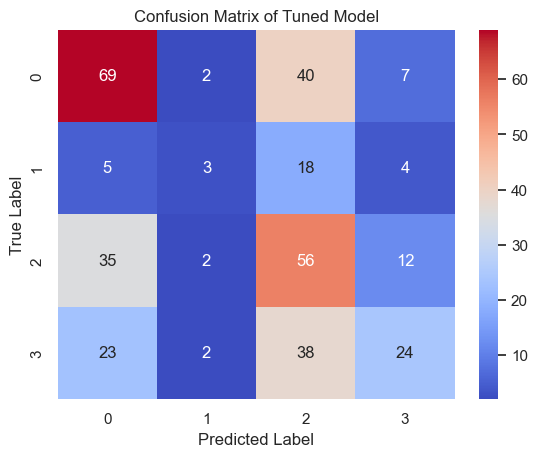

Number of Misclassified Samples: 188


In [185]:
# Re-predict on test set with the best model
y_pred_tuned = best_model.predict(X_test)

# Confusion matrix for error analysis
conf_matrix = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix of Tuned Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Identify misclassified samples for deeper analysis
misclassified = X_test[y_test != y_pred_tuned]
print("Number of Misclassified Samples:", len(misclassified))

In [187]:
# Final accuracy and report on test set
final_accuracy = accuracy_score(y_test, y_pred_tuned)
print("Final Test Accuracy:", final_accuracy)
print("Final Classification Report:\n", classification_report(y_test, y_pred_tuned))

Final Test Accuracy: 0.4470588235294118
Final Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.58      0.55       118
           1       0.33      0.10      0.15        30
           2       0.37      0.53      0.44       105
           3       0.51      0.28      0.36        87

    accuracy                           0.45       340
   macro avg       0.43      0.37      0.37       340
weighted avg       0.46      0.45      0.43       340



In [189]:
# Verify conditions for deployment (e.g., accuracy threshold)
threshold_accuracy = 0.85  # Example threshold
if final_accuracy >= threshold_accuracy:
    print("Model meets the deployment criteria.")
else:
    print("Model does not meet the deployment criteria. Further tuning required.")

Model does not meet the deployment criteria. Further tuning required.
